---

# Исследование рынка видеоигр

---


<u>**Цель проекта**</u>: Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры.

<u>**Сферы деятельности компаний**</u>: gamedev, интернет-магазины.

<u>**Навыки и инструменты**</u>: Matplotlib, NumPy, Pandas, Python, исследовательский анализ данных, описательная статистика, предобработка данных, проверка статистических гипотез.

## Описание данных

***Name*** — название игры

***Platform*** — платформа

***Year_of_Release*** — год выпуска

***Genre*** — жанр игры

***NA_sales*** — продажи в Северной Америке (миллионы долларов)

***EU_sales*** — продажи в Европе (миллионы долларов)

***JP_sales*** — продажи в Японии (миллионы долларов)

***Other_sales*** — продажи в других странах (миллионы долларов)

***Critic_Score*** — оценка критиков (максимум 100)

***User_Score*** — оценка пользователей (максимум 10)

***Rating*** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Данные за 2016 год могут быть неполными.**

## 1. Получение общей информации о данных

Для работы с данными импортируем **Pandas**, **Numpy**, **Math**, **Stats**, **Pyplot** и **Seaborn**:

In [1]:
import pandas as pd
import numpy as np
import math as m
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

Настроим параметры отображения графиков:

In [2]:
from pylab import rcParams
%matplotlib inline
#rcParams['figure.figsize'] = 12, 10
sns.set(rc={'figure.figsize':(14,10)})

Отключим предупреждения об ошибках:

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
data_games = pd.read_csv(...)

In [5]:
data_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- В датасете присутствует информация о **16715 играх**;

- С **именами платформ**, вероятно, придётся поработать;

- Столбцы *'Year_of_Release'*, *'User_Score'* и *'Rating'* необходимо привести к типу "int64";

- **Есть пропуски**.

Посмотрим распределение пропусков по столбцам:

In [7]:
data_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Пропуски в различных столбцах **появились по причинам, не зависящим друг от друга**.

В дальнейшем предстоит принять решение о дальнейшей судьбе строк с пропусками. В первую очередь данное решение будет зависеть от того, насколько важны в контексте нашего исследования отсутствующие в датасете данные.

In [8]:
data_games.duplicated().sum()

0

**Дубликаты отсутствуют**.

In [9]:
data_games.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

Имена столбцов необходимо поменять:

In [10]:
data_games.columns = ['name',
                      'platform',
                      'year',
                      'genre',
                      'na_sales',
                      'eu_sales',
                      'jp_sales',
                      'other_sales',
                      'critic_score',
                      'user_score',
                      'rating']

In [11]:
(data_games[['year',
            'na_sales',
            'eu_sales',
            'jp_sales',
            'other_sales',
            'critic_score',
            'user_score',
            'rating']]
 .describe()
 .iloc[[1, 3, 4, 5, 6, 7]]
)

,year,na_sales,eu_sales,jp_sales,other_sales,critic_score
mean,2006.484616,0.263377,0.14506,0.077617,0.047342,68.967679
min,1980.000000,0.000000,0.00000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.00000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.02000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.11000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.96000,10.220000,10.570000,98.000000


В датасете **присутствуют игры 1980 и более поздних годов выпуска**.

Важно, что **нет игр 2017 и более поздних годов** — данные собраны на момент окончания 2016 года.

<div style="border: solid lightseagreen 3px; padding: 30px"> <h3 style="color:black; margin-bottom:25px"> Вывод: </h3>
    <ul>
        <li>Датасет содержит данные о <b>16715 играх, выпущенных с 1980 по 2016 год</b>;</li>
        <li><b>Названия платформ требуют обработки</b>;</li>
        <li>В целях удобства дальнейшей работы были <b>переименованы столбцы</b> датафрейма;</li>
        <li>Определены столбцы, требующие замены типа данных: <b>'year_of_release', 'user_score' и 'rating'</b>;</li>
        <li>6 столбцов датафрейма содержат <b>пропуски</b>. <b>Причины появления пропусков независимы</b>;</li>
        <li><b>Дубликаты в датасете отсутствуют</b>;</li>
        <li>В дальнейшем необходимо тщательно <b>изучить продажи</b> продукции в разных регионах.</li>
    </ul>
</div>

## 2. Предобработка данных

Взглянем на общую информацию о датафрейме:

In [12]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
data_games

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбце *'year'* заполним пропуски нулями, заменим тип данных на "int64":

In [14]:
data_games['year'] = data_games['year'].fillna(0).astype(np.int64)

Посмотрим, какие значения содержатся в *'user_score'*:

In [15]:
data_games['user_score'].unique().tolist()

['8',
 nan,
 '8.3',
 '8.5',
 '6.6',
 '8.4',
 '8.6',
 '7.7',
 '6.3',
 '7.4',
 '8.2',
 '9',
 '7.9',
 '8.1',
 '8.7',
 '7.1',
 '3.4',
 '5.3',
 '4.8',
 '3.2',
 '8.9',
 '6.4',
 '7.8',
 '7.5',
 '2.6',
 '7.2',
 '9.2',
 '7',
 '7.3',
 '4.3',
 '7.6',
 '5.7',
 '5',
 '9.1',
 '6.5',
 'tbd',
 '8.8',
 '6.9',
 '9.4',
 '6.8',
 '6.1',
 '6.7',
 '5.4',
 '4',
 '4.9',
 '4.5',
 '9.3',
 '6.2',
 '4.2',
 '6',
 '3.7',
 '4.1',
 '5.8',
 '5.6',
 '5.5',
 '4.4',
 '4.6',
 '5.9',
 '3.9',
 '3.1',
 '2.9',
 '5.2',
 '3.3',
 '4.7',
 '5.1',
 '3.5',
 '2.5',
 '1.9',
 '3',
 '2.7',
 '2.2',
 '2',
 '9.5',
 '2.1',
 '3.6',
 '2.8',
 '1.8',
 '3.8',
 '0',
 '1.6',
 '9.6',
 '2.4',
 '1.7',
 '1.1',
 '0.3',
 '1.5',
 '0.7',
 '1.2',
 '2.3',
 '0.5',
 '1.3',
 '0.2',
 '0.6',
 '1.4',
 '0.9',
 '1',
 '9.7']

Изучим распространённость явления под названием "tbd":

In [16]:
data_games.query('user_score == "tbd"')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


"TBD" — скорее всего, сокращение от "*to be determined*". Таких значений у нас 2424, что составляет **почти четверть от общего количества записей**.

Пропуски могли появиться вследствие **ошибок сбора данных** и явно носят **случайный характер**.

В любом случае, никакой информационной нагрузки "TBD" не несёт, и потому **может быть превращено в "NaN"** в процессе дальнейшей обработки. Далее можно заменить все пропуски нулями:

In [17]:
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce').fillna(0)

In [18]:
data_games['critic_score'] = data_games['critic_score'].fillna(0)

Посмотрим, по какому количеству игр отсутствуют данные о продажах в различных регионах:

In [19]:
data_games.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,0.0,0.0,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Таких игр **всего две** — "*G1 Jockey 4 2008*" и "*SCORE International Baja 1000: The Official Game*". Видно, что отсутствуют и данные о рейтингах. **Исключим эти 2 строки**:

In [20]:
data_games = (data_games
              .query('na_sales != 0 or eu_sales != 0 or jp_sales != 0 or other_sales != 0')
              .reset_index(drop=True)
             )

Взглянем на оценки критиков и пользователей:

In [21]:
data_games.query('critic_score > 100 or critic_score < 0')['name'].count()

0

In [22]:
data_games.query('user_score > 10 or user_score < 0')['name'].count()

0

**Всё в полном порядке**.

In [23]:
data_games['genre'].value_counts()

Action          3369
Sports          2347
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1248
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [24]:
data_games['platform'].value_counts()

PS2     2160
DS      2151
PS3     1330
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

В названиях игровых платформ **крайне сложно разобраться**.

In [25]:
platforms = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC', '3DS', 'PSV', 'PS4',
             'N64', 'XOne', 'SNES', 'SAT', 'WiiU', '2600', 'GB', 'NES', 'DC', 'GEN', 'NG', 'SCD', 'WS',
             '3DO', 'TG16', 'GG', 'PCFX']

new_platforms = ['Sony_PlayStation_2',
                 'Nintendo_DS',
                 'Sony_PlayStation_3',
                 'Nintendo_Wii',
                 'Microsoft_Xbox_360',
                 'Sony_PlayStation_Portable',
                 'Sony_PlayStation',
                 'PC',
                 'Microsoft_Xbox',
                 'Nintendo_Game_Boy_Advance',
                 'Nintendo_GameCube',
                 'Nintendo_3DS',
                 'Sony_PlayStation_Vita',
                 'Sony_PlayStation_4',
                 'Nintendo_64',
                 'Microsoft_Xbox_One',
                 'Super_Nintendo_Entertainment_System',
                 'Sega_Saturn',
                 'Nintendo_Wii_U',
                 'Atari_2600',
                 'Nintendo_Game_Boy',
                 'Nintendo_Entertainment_System',
                 'Sega_Dreamcast',
                 'Sega_Mega_Drive',
                 'SNK_Neo-Geo',
                 'Sega_Mega_CD',
                 'Bandai_WonderSwan',
                 '3DO_Interactive_Multiplayer',
                 'NEC_PC_Engine',
                 'Sega_Game_Gear',
                 'NEC_PC-FX']

In [26]:
platforms_dict = dict(zip(platforms, new_platforms))
platforms_dict

{'PS2': 'Sony_PlayStation_2',
 'DS': 'Nintendo_DS',
 'PS3': 'Sony_PlayStation_3',
 'Wii': 'Nintendo_Wii',
 'X360': 'Microsoft_Xbox_360',
 'PSP': 'Sony_PlayStation_Portable',
 'PS': 'Sony_PlayStation',
 'PC': 'PC',
 'XB': 'Microsoft_Xbox',
 'GBA': 'Nintendo_Game_Boy_Advance',
 'GC': 'Nintendo_GameCube',
 '3DS': 'Nintendo_3DS',
 'PSV': 'Sony_PlayStation_Vita',
 'PS4': 'Sony_PlayStation_4',
 'N64': 'Nintendo_64',
 'XOne': 'Microsoft_Xbox_One',
 'SNES': 'Super_Nintendo_Entertainment_System',
 'SAT': 'Sega_Saturn',
 'WiiU': 'Nintendo_Wii_U',
 '2600': 'Atari_2600',
 'GB': 'Nintendo_Game_Boy',
 'NES': 'Nintendo_Entertainment_System',
 'DC': 'Sega_Dreamcast',
 'GEN': 'Sega_Mega_Drive',
 'NG': 'SNK_Neo-Geo',
 'SCD': 'Sega_Mega_CD',
 'WS': 'Bandai_WonderSwan',
 '3DO': '3DO_Interactive_Multiplayer',
 'TG16': 'NEC_PC_Engine',
 'GG': 'Sega_Game_Gear',
 'PCFX': 'NEC_PC-FX'}

In [27]:
for i in platforms_dict:
    data_games['platform'] = np.where(data_games['platform'] == i,
                                  platforms_dict[i],
                                  data_games['platform'])

In [28]:
data_games['platform'].value_counts()

Sony_PlayStation_2                     2160
Nintendo_DS                            2151
Sony_PlayStation_3                     1330
Nintendo_Wii                           1320
Microsoft_Xbox_360                     1262
Sony_PlayStation_Portable              1209
Sony_PlayStation                       1197
PC                                      974
Microsoft_Xbox                          824
Nintendo_Game_Boy_Advance               822
Nintendo_GameCube                       556
Nintendo_3DS                            520
Sony_PlayStation_Vita                   430
Sony_PlayStation_4                      392
Nintendo_64                             319
Microsoft_Xbox_One                      247
Super_Nintendo_Entertainment_System     239
Sega_Saturn                             173
Nintendo_Wii_U                          147
Atari_2600                              133
Nintendo_Entertainment_System            98
Nintendo_Game_Boy                        98
Sega_Dreamcast                  

Теперь названия платформ информативны и позволяют в случае необходимости быстро проанализировать общую информацию о выпущенных на них играх.

Вычислим **суммарные объёмы продаж** присутствующих в датасете игр:

In [29]:
data_games['total_sales'] = (data_games['na_sales']
                             + data_games['eu_sales']
                             + data_games['jp_sales']
                             + data_games['other_sales']
                            )

data_games = data_games[['name',
                         'platform',
                         'year',
                         'genre',
                         'na_sales',
                         'eu_sales',
                         'jp_sales',
                         'other_sales',
                         'total_sales',
                         'critic_score',
                         'user_score',
                         'rating']]

data_games

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Nintendo_Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,Nintendo_Entertainment_System,1985,Platform,29.08,3.58,6.81,0.77,40.24,0.0,0.0,NaN
2,Mario Kart Wii,Nintendo_Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Nintendo_Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,Nintendo_Game_Boy,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,Sony_PlayStation_3,2016,Action,0.00,0.00,0.01,0.00,0.01,0.0,0.0,NaN
16709,LMA Manager 2007,Microsoft_Xbox_360,2006,Sports,0.00,0.01,0.00,0.00,0.01,0.0,0.0,NaN
16710,Haitaka no Psychedelica,Sony_PlayStation_Vita,2016,Adventure,0.00,0.00,0.01,0.00,0.01,0.0,0.0,NaN
16711,Spirits & Spells,Nintendo_Game_Boy_Advance,2003,Platform,0.01,0.00,0.00,0.00,0.01,0.0,0.0,NaN


In [30]:
data_games.columns.tolist()

['name',
 'platform',
 'year',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'total_sales',
 'critic_score',
 'user_score',
 'rating']

<div style="border: solid lightseagreen 3px; padding: 30px"> <h3 style="color:black; margin-bottom:25px"> Вывод: </h3>
    <ul>
        <li><b>Изучены пропуски, описан их характер и возможная причина появления</b>;</li>
        <li><b>Заполнены нулями</b> пропуски в столбце <i>'year'</i>, <b>заменён тип данных</b> на "int64";</li>
        <li>Изучены строки, содержащие в столбце <i>'user_score'</i> значение <b>"tbd"</b>;</li>
        <li>Все значения "tbd" были <b>заменены на "NaN"</b> в процессе приведения данных столбца к типу "float64", а в дальнейшем были <b>заполнены нулевыми значениями</b>;</li>
        <li><b>Исключены 2 игры, информация о продажах и рейтингах которых отсутствовала в датасете</b>;</li>
        <li>Были проанализированы шифры в столбце <i>'platform'</i>, установлены и добавлены <b>официальные названия платформ</b>;</li>
        <li>Вычислены <b>суммарные объёмы продаж</b> игр.</li>
    </ul>
</div>

## 3. Исследовательский анализ данных

Попробуем оценить по датасету, **как менялось количество выпускаемых игр в разные годы**:

In [31]:
years = []
games_count = []

for i in range(2017-1980):
    i += 1980
    years.append(i)
    games_count.append(data_games.query('year == @i')['name'].count())
    
games_count_distribution = pd.DataFrame(columns = ['games_count'], data = games_count)
games_count_distribution['years'] = years

In [32]:
games_count_distribution

,games_count,years
0,9,1980
1,46,1981
2,36,1982
3,17,1983
4,14,1984
5,14,1985
6,21,1986
7,16,1987
8,15,1988
9,17,1989


Распределение количества выпускаемых игр по годам:


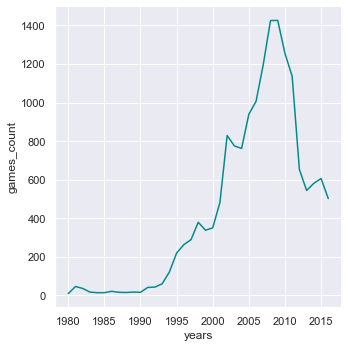

In [33]:
print('Распределение количества выпускаемых игр по годам:')
sns.relplot(x='years',
            y='games_count',
            kind='line',
            color='darkcyan',
            data=games_count_distribution)
plt.show()

Из графика видим общую тенденцию: **с 1990 года наблюдался почти экспоненциальный рост выпуска видеоигр**.

В общую картину вписывается и знаменитый *кризис 1983 года*: **между 1980 и 1990 годами мы видим на кривой плато**.

Наблюдаем **пик у 2009 года, за которым следует резкое падение объёмов**. Возможно, это связано с сокращением числа платформ в начале XXI века. Проверим наше предположение:

Распределение количества выпускаемых игр по годам (PC):


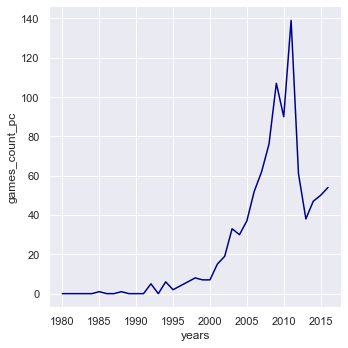

Распределение количества выпускаемых игр по годам (консоли и портативные игровые устройства):


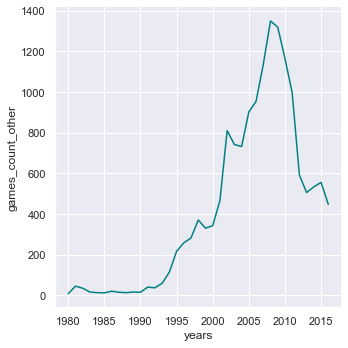

In [34]:
games_count_pc = []

for i in range(2017-1980):
    i += 1980
    games_count_pc.append(data_games.query('year == @i and platform == "PC"')['name'].count())
    
games_count_distribution_pc = pd.DataFrame(columns = ['games_count_pc'], data = games_count_pc)
games_count_distribution_pc['years'] = years
print('Распределение количества выпускаемых игр по годам (PC):')
sns.relplot(x='years',
            y='games_count_pc',
            kind='line',
            color='darkblue',
            data=games_count_distribution_pc)
plt.show()

games_count_other = []

for i in range(2017-1980):
    i += 1980
    games_count_other.append(data_games.query('year == @i and platform != "PC"')['name'].count())
    
games_count_distribution_other = pd.DataFrame(columns = ['games_count_other'], data = games_count_other)
games_count_distribution_other['years'] = years
print('Распределение количества выпускаемых игр по годам (консоли и портативные игровые устройства):')
sns.relplot(x='years',
            y='games_count_other',
            kind='line',
            color='teal',
            data=games_count_distribution_other)
plt.show()

In [35]:
print('Доля компьютерных игр в общей выборке: {:.2%}'
      .format(games_count_distribution_pc['games_count_pc'].sum()
/games_count_distribution_other['games_count_other'].sum()))

Доля компьютерных игр в общей выборке: 6.18%


Второй график — почти копия кривой общего распределения. И это логично: ведь **доля компьютерных игр в общей выборке невелика — всего 6%**.

Падение объёмов после 2009 года наблюдается на всех платформах.

Скорее всего, истинная причина в смене концепции видеоигр. Играм "по сто рублей за диск" на смену пришли **по-настоящему ресурсоёмкие и трудозатратные проекты**, разработка которых, по сравнению с предшественниками, занимала a priori в несколько раз больше времени. Продажа дистрибутивов перестала быть единственным видом дохода — новая концепция игр предполагала **платный дополнительный контент (DLC)**, а впоследствие и весьма широкий спектр **внутриигровых покупок**. Таким образом, поддержка уже выпущенных игр стала более приоритетной, а непрерывный выпуск новых игр перестал быть "основным условием выживания" на рынке видеоигр.

Проанализируем распределение игр и их продаж по платформам:

In [36]:
(data_games
 .pivot_table(index='platform',
              values='total_sales',
              aggfunc='sum'
             )
 .sort_values('total_sales',
              ascending=False
             )
).head(10)

,total_sales
platform,
Sony_PlayStation_2,1255.77
Microsoft_Xbox_360,971.42
Sony_PlayStation_3,939.65
Nintendo_Wii,907.51
Nintendo_DS,806.12
Sony_PlayStation,730.86
Nintendo_Game_Boy_Advance,317.85
Sony_PlayStation_4,314.14
Sony_PlayStation_Portable,294.05


В десятку лидирующих платформ по суммарному объёму продаж игр во всех регионах попали **Sony PlayStation 2**, **Microsoft Xbox 360**, **Sony PlayStation 3**, **Nintendo Wii**, **Nintendo DS**, **Sony PlayStation**, **Nintendo Game Boy Advance**, **Sony PlayStation 4**, **Sony PlayStation Portable** и **PC**.

Распределение общих объёмов продаж игр (Sony PlayStation 2)


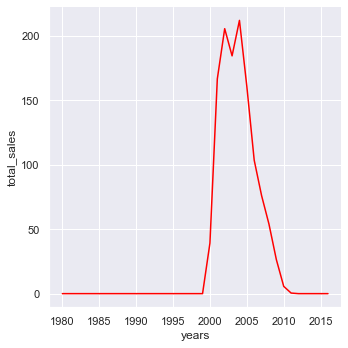

Начало продаж игр на платформе: 2000 год
Пик объёмов продаж игр на платформе: 2004 год
Окончание активной продажи игр на платформе: 2011 год
Период активных продаж игр на платформе: 12 лет



Распределение общих объёмов продаж игр (Microsoft Xbox 360)


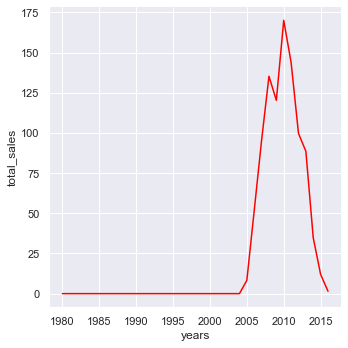

Начало продаж игр на платформе: 2005 год
Пик объёмов продаж игр на платформе: 2010 год
Окончание активной продажи игр на платформе: 2016 год
Период активных продаж игр на платформе: 12 лет



Распределение общих объёмов продаж игр (Sony PlayStation 3)


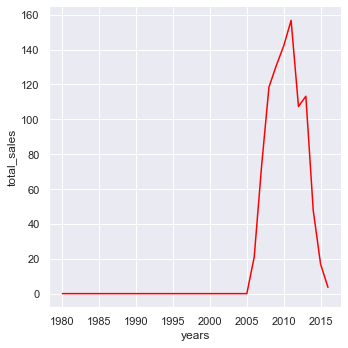

Начало продаж игр на платформе: 2006 год
Пик объёмов продаж игр на платформе: 2011 год
Окончание активной продажи игр на платформе: 2016 год
Период активных продаж игр на платформе: 11 лет



Распределение общих объёмов продаж игр (Nintendo Wii)


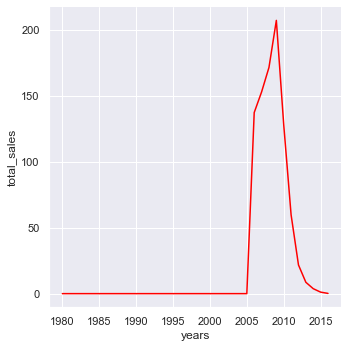

Начало продаж игр на платформе: 2006 год
Пик объёмов продаж игр на платформе: 2009 год
Окончание активной продажи игр на платформе: 2016 год
Период активных продаж игр на платформе: 11 лет



Распределение общих объёмов продаж игр (Nintendo DS)


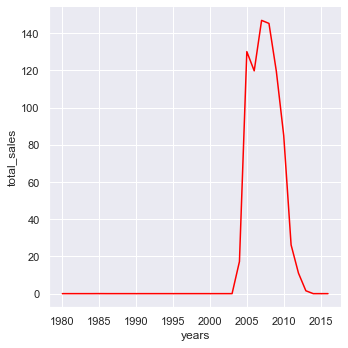

Начало продаж игр на платформе: 1985 год
Пик объёмов продаж игр на платформе: 2007 год
Окончание активной продажи игр на платформе: 2013 год
Период активных продаж игр на платформе: 11 лет



Распределение общих объёмов продаж игр (Sony PlayStation)


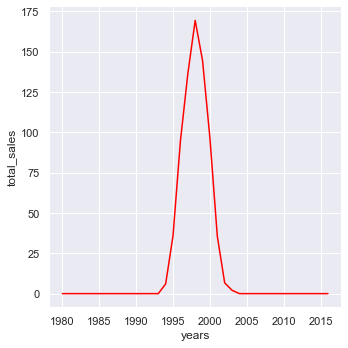

Начало продаж игр на платформе: 1994 год
Пик объёмов продаж игр на платформе: 1998 год
Окончание активной продажи игр на платформе: 2003 год
Период активных продаж игр на платформе: 10 лет



Распределение общих объёмов продаж игр (Nintendo Game Boy Advance)


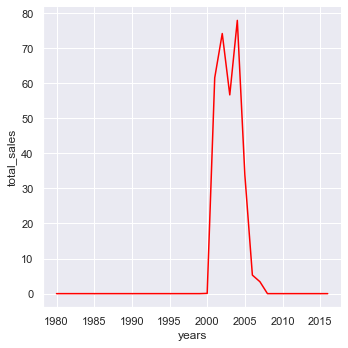

Начало продаж игр на платформе: 2000 год
Пик объёмов продаж игр на платформе: 2004 год
Окончание активной продажи игр на платформе: 2007 год
Период активных продаж игр на платформе: 8 лет



Распределение общих объёмов продаж игр (Sony PlayStation 4)


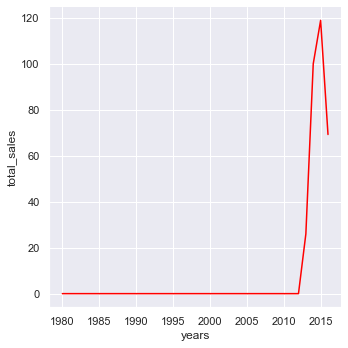

Начало продаж игр на платформе: 2013 год
Пик объёмов продаж игр на платформе: 2015 год
Окончание активной продажи игр на платформе: 2016 год
Период активных продаж игр на платформе: 4 лет



Распределение общих объёмов продаж игр (Sony PlayStation Portable)


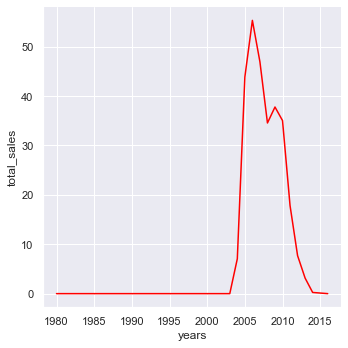

Начало продаж игр на платформе: 2004 год
Пик объёмов продаж игр на платформе: 2006 год
Окончание активной продажи игр на платформе: 2015 год
Период активных продаж игр на платформе: 12 лет



Распределение общих объёмов продаж игр (PC)


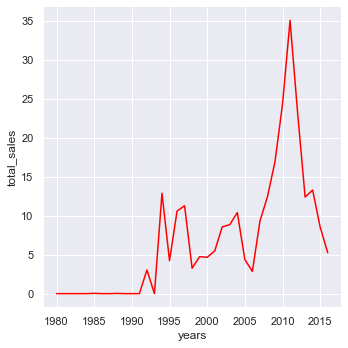

Начало продаж игр на платформе: 1985 год
Пик объёмов продаж игр на платформе: 2011 год
Окончание активной продажи игр на платформе: 2016 год
Период активных продаж игр на платформе: 26 лет





In [37]:
gbl = globals()

for i in ['Sony_PlayStation_2',
          'Microsoft_Xbox_360',
          'Sony_PlayStation_3',
          'Nintendo_Wii',
          'Nintendo_DS',
          'Sony_PlayStation',
          'Nintendo_Game_Boy_Advance',
          'Sony_PlayStation_4',
          'Sony_PlayStation_Portable',
          'PC']:
    gbl['games_'+str(i)] = []
    
    for j in range(2017-1980):
        j += 1980
        
        gbl['games_'+str(i)].append(data_games
                                          .query('year == @j and platform == @i')
                                          ['total_sales']
                                          .sum()
                                         )
    gbl['games_'+str(i)] = pd.DataFrame(data = gbl['games_'+str(i)], columns=['total_sales'])
    gbl['games_'+str(i)]['years'] = years
    print('Распределение общих объёмов продаж игр ('+str(i).replace('_', ' ')+')')
    sns.relplot(data=gbl['games_'+str(i)],
                x='years',
                y='total_sales',
                kind='line',
                color='red'
               )
    
    plt.show()
    
    years_min = (gbl['games_'+str(i)]
                 .query('total_sales != 0')
                 ['years']
                 .min()
                )
    
    years_max = (gbl['games_'+str(i)]
                 .query('total_sales != 0')
                 ['years']
                 .max()
                )
    
    sales_max = (gbl['games_'+str(i)]
                 ['total_sales']
                 .max()
                )
    
    print('Начало продаж игр на платформе: {} год'
          .format(gbl['games_'+str(i)]
                  .query('total_sales != 0 and years == @years_min')
                 ['years'].sum()
                 )
         )
    
    print('Пик объёмов продаж игр на платформе: {} год'
          .format(gbl['games_'+str(i)]
                  .query('total_sales == @sales_max')
                  ['years'].sum()
                 )
         )
    
    print('Окончание активной продажи игр на платформе: {} год'
          .format(gbl['games_'+str(i)]
                  .query('total_sales != 0 and years == @years_max')
                 ['years'].sum()
                 )
         )
    
    print('Период активных продаж игр на платформе: {} лет'
          .format(gbl['games_'+str(i)]
                  .query('total_sales != 0')
                  ['total_sales']
                  .count()
                 )
         )
    
    print()
    print()
    print()

ПК — платформа самобытная. Очевидно, что после 1980 года, когда **транзисторы начали активно вытеснять лампы**, миниатюризация микроэлектроники сделала персональные компьютеры меньше, дешевле и, как следствие, **популярнее**. 1985 год на графике свидетельствует о **росте популярности ПК как платформы для видеоигр**.

Консоли и портативные игровые устройства, в отличие от ПК, **лишены возможности замены отдельных комплектующих на более мощные и современные**. Это одна из главных причин, **ограничивающих их срок жизни** в условиях постоянного развития видеоигровой индустрии. Из графиков видно, что такие платформы живут **от 8 до 12 лет**. В среднем, это около 11 лет, что близко к максимальному сроку жизни среднестатистического игрового ПК.

В дальнейшем примем **средний характерный период существования игровых платформ** за **11 лет**.

Создадим новый датафрейм, в котором оставим только данные за актуальный период:

In [38]:
data_games_actual = data_games.query('year >= 2005 and total_sales != 0').reset_index(drop=True)
sorted(data_games_actual['platform'].unique().tolist())

['Microsoft_Xbox',
 'Microsoft_Xbox_360',
 'Microsoft_Xbox_One',
 'Nintendo_3DS',
 'Nintendo_DS',
 'Nintendo_GameCube',
 'Nintendo_Game_Boy_Advance',
 'Nintendo_Wii',
 'Nintendo_Wii_U',
 'PC',
 'Sega_Dreamcast',
 'Sony_PlayStation_2',
 'Sony_PlayStation_3',
 'Sony_PlayStation_4',
 'Sony_PlayStation_Portable',
 'Sony_PlayStation_Vita']

Выявим топ лидеров по продажам за актуальный период:

In [39]:
(data_games_actual
 .pivot_table(index='platform',
              values='total_sales',
              aggfunc='sum'
             )
 .sort_values('total_sales',
              ascending=False
             )
).head(10)

,total_sales
platform,
Microsoft_Xbox_360,961.24
Sony_PlayStation_3,931.34
Nintendo_Wii,891.18
Nintendo_DS,785.49
Sony_PlayStation_2,426.46
Sony_PlayStation_4,314.14
Sony_PlayStation_Portable,282.47
Nintendo_3DS,257.81
PC,167.79


Топ-10 лидеров по продажам за актуальный период распределился следующим образом:

 1. **Microsoft Xbox 360**;
 2. **Sony PlayStation 3**;
 3. **Nintendo Wii**;
 4. **Nintendo DS**;
 5. **Sony PlayStation 2**;
 6. **Sony PlayStation 4**;
 7. **Sony PlayStation Portable**;
 8. **Nintendo 3DS**;
 9. **PC**;
 10. **Microsoft Xbox One**.

Распределение общих объёмов продаж игр на Microsoft Xbox 360 с 2005 года:


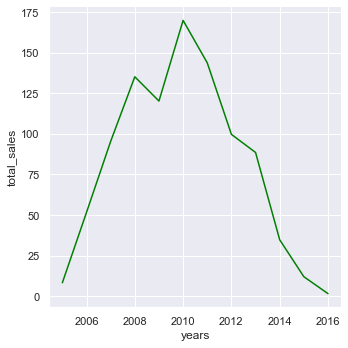




Распределение общих объёмов продаж игр на Sony PlayStation 3 с 2005 года:


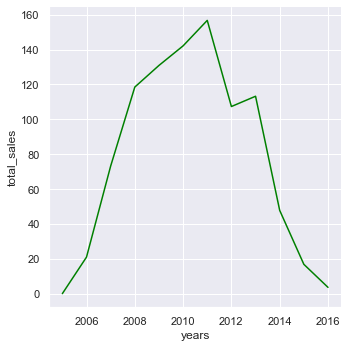




Распределение общих объёмов продаж игр на Nintendo Wii с 2005 года:


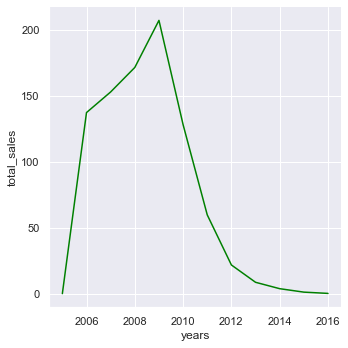




Распределение общих объёмов продаж игр на Nintendo DS с 2005 года:


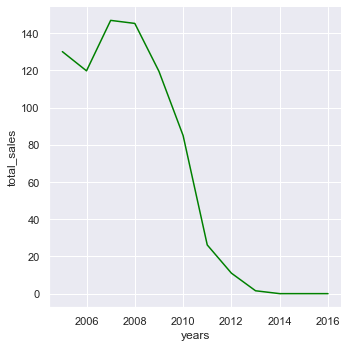




Распределение общих объёмов продаж игр на Sony PlayStation 2 с 2005 года:


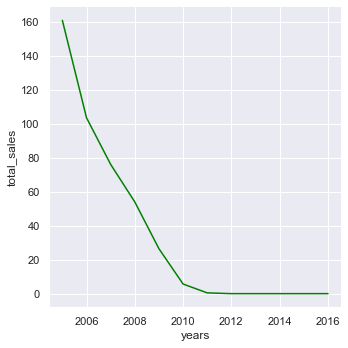




Распределение общих объёмов продаж игр на Sony PlayStation 4 с 2005 года:


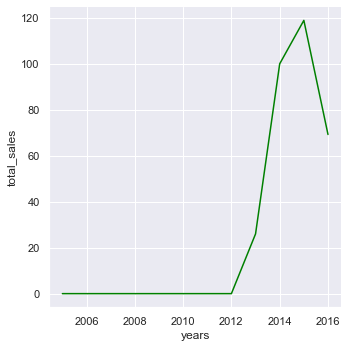




Распределение общих объёмов продаж игр на Sony PlayStation Portable с 2005 года:


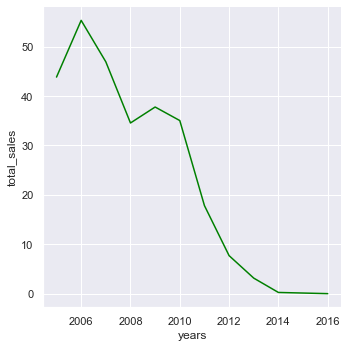




Распределение общих объёмов продаж игр на Nintendo 3DS с 2005 года:


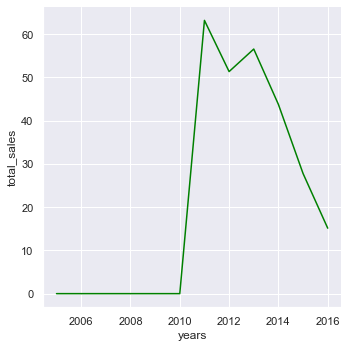




Распределение общих объёмов продаж игр на PC с 2005 года:


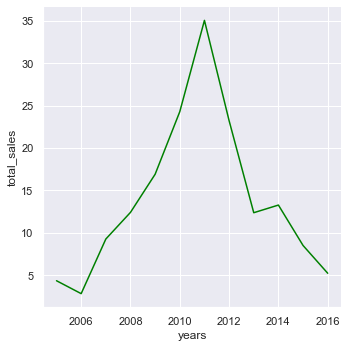




Распределение общих объёмов продаж игр на Microsoft Xbox One с 2005 года:


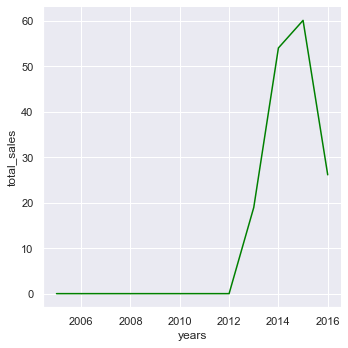

In [40]:
years_actual = []
platforms_top10 = ['Microsoft_Xbox_360',
          'Sony_PlayStation_3',
          'Nintendo_Wii',
          'Nintendo_DS',
          'Sony_PlayStation_2',
          'Sony_PlayStation_4',
          'Sony_PlayStation_Portable',
          'Nintendo_3DS',
          'PC',
          'Microsoft_Xbox_One']

for i in range(2017-2005):
    i += 2005
    years_actual.append(i)

for i in platforms_top10:
    
    gbl['games_actual_'+str(i)] = []
    
    for j in range(2017-2005):
        j += 2005
        
        gbl['games_actual_'+str(i)].append(data_games_actual
                                          .query('year == @j and platform == @i')
                                          ['total_sales']
                                          .sum()
                                         )
    gbl['games_actual_'+str(i)] = pd.DataFrame(data = gbl['games_actual_'+str(i)], columns=['total_sales'])
    gbl['games_actual_'+str(i)]['years'] = years_actual
    
    print('Распределение общих объёмов продаж игр на '+str(i).replace('_', ' ')+' с 2005 года:')
    
    sns.relplot(data=gbl['games_actual_'+str(i)],
                x='years',
                y='total_sales',
                kind='line',
                color='green'
               )
    
    plt.show()
        
    print()
    print()
    print()

Из графиков видно, что на момент сбора данных **активные продажи игр на платформах Microsoft Xbox 360, Sony PlayStation 3, Nintendo Wii, Nintendo DS, Sony PlayStation 2, Sony PlayStation Portable и Nintendo 3DS закончились**.

Поезд почти ушёл. Но "запрыгнуть в последний вагон" ещё можно, ведь **падающие активные продажи Sony PlayStation 4, Nintendo 3DS и Microsoft Xbox One ещё не достигли нуля**.

Отдельно стоит упомянуть ПК. Несмотря на то, что график распределения общих объёмов продаж игр за выбранный период выглядит вполне обыденно, из ранее сделанных выводов понятно, что **ПК по-прежнему является актуальной и перспективной платформой**.

Сосредоточимся на платформах, входящих в **топ-10 по продажам с 2005 по 2016 год**:

In [41]:
data_games_actual_top10 = data_games_actual.query('platform in @platforms_top10').reset_index(drop=True)
data_games_actual_top10.sort_values('total_sales', ascending=False)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Nintendo_Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Mario Kart Wii,Nintendo_Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
2,Wii Sports Resort,Nintendo_Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
3,New Super Mario Bros.,Nintendo_DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
4,Wii Play,Nintendo_Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...,...
9743,Datenshi no Amai Yuuwaku x Kaikan Phrase,Nintendo_DS,2010,Adventure,0.00,0.00,0.01,0.00,0.01,0.0,0.0,NaN
9742,Hiiro no Kakera: Shin Tamayori Hime Denshou,Sony_PlayStation_2,2009,Adventure,0.00,0.00,0.01,0.00,0.01,0.0,0.0,NaN
9741,"Iza, Shutsujin! Koisen",Sony_PlayStation_Portable,2011,Adventure,0.00,0.00,0.01,0.00,0.01,0.0,0.0,NaN
9740,Major Dream: Major Wii Nagero! Gyroball!!,Nintendo_Wii,2008,Sports,0.00,0.00,0.01,0.00,0.01,0.0,0.0,NaN


Построим **"ящики с усами"** для всех 10 платформ:

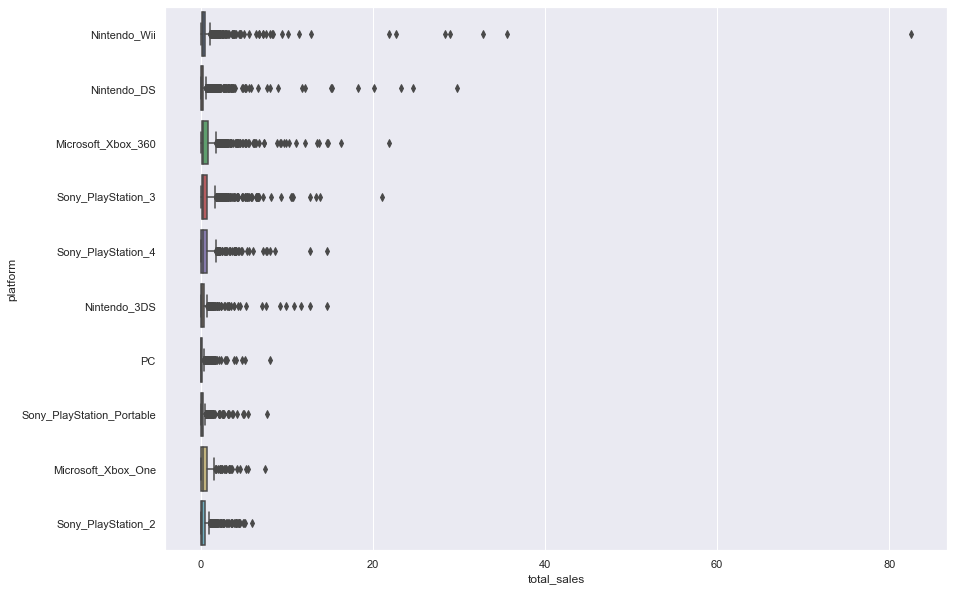

In [42]:
sns.boxplot(y="platform",
            x="total_sales",
            data=data_games_actual_top10.query('platform in @platforms_top10'),
            orient="h"
           )
plt.show()

Да, этого и следовало ожидать. Поскольку значения общих продаж во всех регионах для различных игр могут отличаться в 8000 и более раз, выбросы занимают до 95% всей области построения.

**Скроем значения, выходящие за пределы наблюдаемых минимумов и максимумов**:

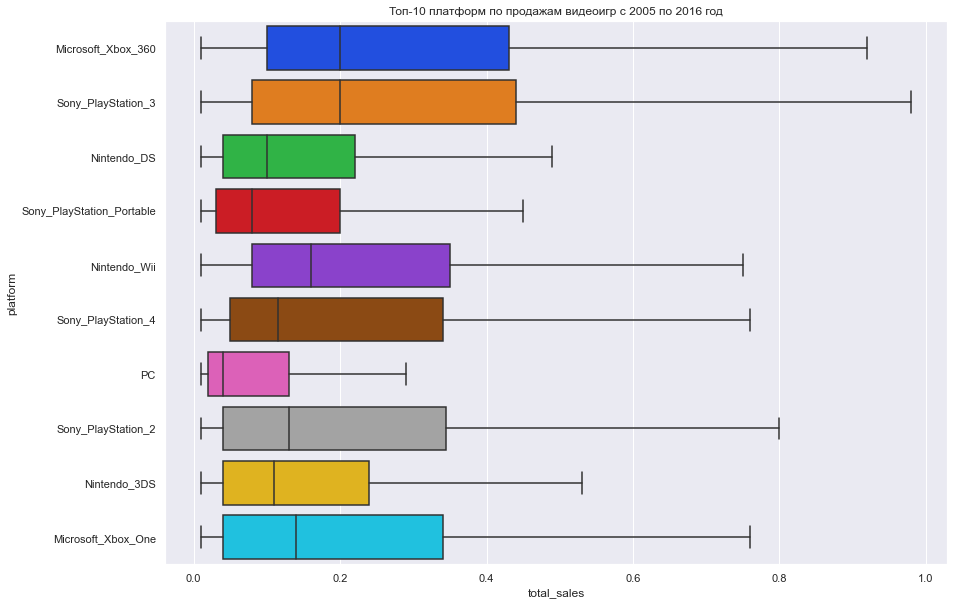

In [43]:
(sns.boxplot(y="platform",
             x="total_sales",
             data=data_games_actual_top10.query('platform in @platforms_top10 and total_sales < 1'),
             orient="h",
             palette=("bright"),
            showfliers=False)
.set_title('Топ-10 платформ по продажам видеоигр с 2005 по 2016 год')
)

plt.show()

Даже первая попытка построения "ящиков с усами" весьма показательна: абсолютный и недосягаемый лидер по суммарным продажам во всех регионах — **"Wii Sports"** на платформе Nintendo Wii. Видно, насколько далеко расположена метка данного продукта в области построения.

По основной области можно оценить разницу в продажах на разных платформах.

- **Самая большая разница в продажах игр — на Sony PlayStation 3: точка обозримого максимума расположилась недалеко от 1.000.000$**;

- **Самая маленькая — на ПК: точка обозримого максимума находится на уровне 300.000$**;

- Медианные значения, в отличие от средних, гораздо более устойчивы к выбросам и довольно хорошо описывают каждую выборку. **Медианные значения выше всего на платформах Microsoft Xbox 360, Sony PlasyStation 3 и Nintendo Wii**. **Ниже всего — на ПК, PlayStation Portable и Nintendo DS**.

На примере **Sony PlayStation 3** посмотрим, как влияют на продажи внутри платформы отзывы пользователей и критиков.

Для этого обратимся к **корреляционной матрице**:

In [44]:
(data_games_actual_top10.query('platform == "Sony_PlayStation_3"')
 [['total_sales', 'critic_score', 'user_score']]
 .corr()
)

,total_sales,critic_score,user_score
total_sales,1.000000,0.354909,0.274281
critic_score,0.354909,1.000000,0.822866
user_score,0.274281,0.822866,1.000000


Наблюдается положительная корреляция между рейтингами и суммарными объёмами продаж: **чем выше оценки, тем выше продажи**. Видно, что **оценки критиков имеют больший вес, чем оценки пользователей**.

Посмотрим, насколько отличается общая картина на других популярных платформах:

In [45]:
for i in platforms_top10:
    print(str(i).replace('_', ' '))
    display(data_games_actual_top10
     .query('platform == @i')
     [['total_sales', 'critic_score', 'user_score']]
     .corr()
         )
    print()
    print()

Microsoft Xbox 360


,total_sales,critic_score,user_score
total_sales,1.000000,0.311756,0.207806
critic_score,0.311756,1.000000,0.790158
user_score,0.207806,0.790158,1.000000




Sony PlayStation 3


,total_sales,critic_score,user_score
total_sales,1.000000,0.354909,0.274281
critic_score,0.354909,1.000000,0.822866
user_score,0.274281,0.822866,1.000000




Nintendo Wii


,total_sales,critic_score,user_score
total_sales,1.000000,0.188944,0.184527
critic_score,0.188944,1.000000,0.796863
user_score,0.184527,0.796863,1.000000




Nintendo DS


,total_sales,critic_score,user_score
total_sales,1.000000,0.164655,0.193945
critic_score,0.164655,1.000000,0.719828
user_score,0.193945,0.719828,1.000000




Sony PlayStation 2


,total_sales,critic_score,user_score
total_sales,1.000000,0.350655,0.320041
critic_score,0.350655,1.000000,0.789542
user_score,0.320041,0.789542,1.000000




Sony PlayStation 4


,total_sales,critic_score,user_score
total_sales,1.000000,0.22755,0.113116
critic_score,0.227550,1.00000,0.900850
user_score,0.113116,0.90085,1.000000




Sony PlayStation Portable


,total_sales,critic_score,user_score
total_sales,1.000000,0.333702,0.345741
critic_score,0.333702,1.000000,0.848187
user_score,0.345741,0.848187,1.000000




Nintendo 3DS


,total_sales,critic_score,user_score
total_sales,1.000000,0.167021,0.150053
critic_score,0.167021,1.000000,0.908544
user_score,0.150053,0.908544,1.000000




PC


,total_sales,critic_score,user_score
total_sales,1.000000,0.201692,0.095421
critic_score,0.201692,1.000000,0.753672
user_score,0.095421,0.753672,1.000000




Microsoft Xbox One


,total_sales,critic_score,user_score
total_sales,1.000000,0.274839,0.116563
critic_score,0.274839,1.000000,0.774153
user_score,0.116563,0.774153,1.000000


Исходя из построенных корреляционных матриц можно сделать вывод о том, что **на всех платформах увеличение оценок критиков и пользователей приводит к увеличению объёмов продаж, при этом влияние оценок критиков сильнее, чем влияние оценок пользователей**.

**Сильнее всего влияние оценок на продажи наблюдается на Sony PlayStation 3, PlayStation 2 и Microsoft Xbox 360, слабее всего — на Nintendo Wii, DS и 3DS**.

Проанализируем распределение игр по жанрам:

,total_sales
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


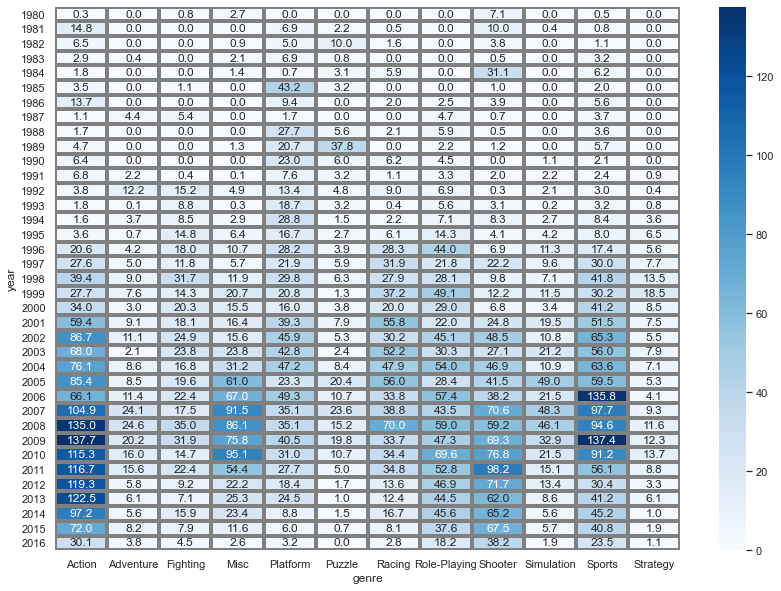

In [46]:
display(data_games
        .pivot_table(index='genre',
                     values='total_sales',
                     aggfunc=sum)
        .sort_values('total_sales',
                     ascending=False)
       )

data_genres_years = (data_games
                     .query('year != 0')
                     .pivot_table(index='year',
                                  columns='genre',
                                  values='total_sales',
                                  aggfunc=sum)
                     .fillna(0)
                     .applymap(float)
                        )
sns.heatmap(data_genres_years,
            annot=True,
            fmt=".1f",
            linecolor='grey',
            cmap="Blues",
            linewidths=3)
sns.set(rc={'figure.figsize':(15,25)})
plt.show()

Суммарные продажи говорят о том, что **"Экшн" — самый прибыльный жанр. С большим отставанием следом идут жанры "Спорт" и "Шутер"**.

**Явными аутсайдерами оказались жанры "Стратегия", "Приключения" и "Головоломка"**.

***Тепловая карта*** даёт более детализированную информацию, здесь мы уже можем судить о **динамике продаж по жанрам**.

Например, мы можем **провести условную временную границу, после которой некоторые конкретные жанры начали набирать популярность** (жанры категории "Misc" мы не можем рассматривать по понятным причинам):

- "Экшн": 2001 год;
- "Платформер": 1991 год;
- "Гонки": 1996 год;
- "Ролевая игра": 1996 год;
- "Шутер": 2001 год;
- "Симулятор": 1996 год;
- "Спорт": 1996 год;
- "Стратегия": 1994 год.

Также мы можем оценить максимумы объёмов продаж:

- "Экшн": 2009 год;
- "Приключения": 2008 год;
- "Файтинг": 2008 год;
- "Платформер": 2006 год;
- "Головоломка": 1989 год;
- "Гонки": 2008 год;
- "Ролевая игра": 2010 год;
- "Шутер": 2011 год;
- "Симулятор": 2005 год;
- "Спорт": 2009 год;
- "Стратегия": 1999 год.

Тепловая карта хорошо показывает и **жанры, которые принесли разным платформам большую долю их прибыли**:

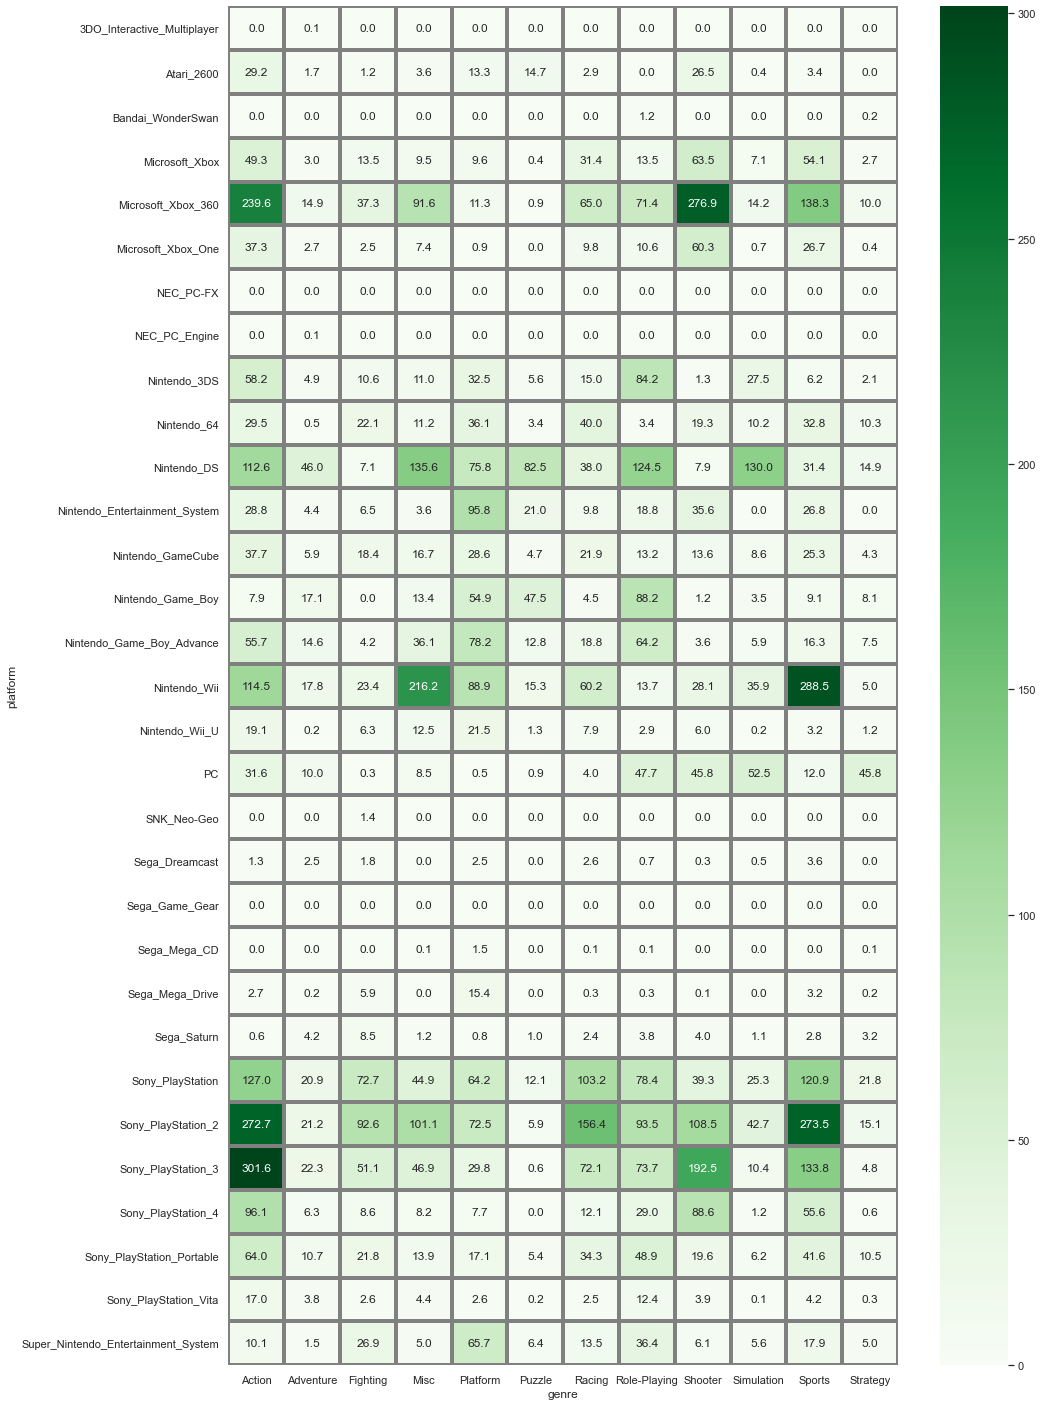

In [47]:
data_genres_platforms = (data_games
                         .pivot_table(index='platform',
                                      columns='genre',
                                      values='total_sales',
                                      aggfunc=sum)
                         .fillna(0)
                         .applymap(float)
                        )
sns.heatmap(data_genres_platforms,
            annot=True,
            fmt=".1f",
            linecolor='grey',
            cmap="Greens",
            linewidths=3)
sns.set(rc={'figure.figsize':(10,17)})
plt.show()

На платформах **Sony PlayStation разных поколений** лучше всего продавались **экшн-игры**, на **Nintendo Wii** — **спортивные игры**, на **Microsoft Xbox 360** — **шутеры**.

<div style="border: solid lightseagreen 3px; padding: 30px"> <h3 style="color:black; margin-bottom:25px"> Вывод: </h3>
    <ul>
        <li>Получено распределение <b>количества выпускаемых игр по годам</b>;</li>
        <li><b>Общая доля компьютерных игр в рассматриваемой выборке составляет около 6%</b>;</li>
        <li>С 1980 по 1990 год <b>наблюдались крайне низкие продажи видеоигр</b>;</li>
        <li>Отмечен <b>экспоненциальный рост количества выпускаемых игр</b> с 1990 по 2009 год;</li>
        <li>После 2009 года <b>объёмы продаж игр синхронно падает на всех платформах</b>;</li>
        <li>На основании анализируемого датасета <b>сформирован топ-10 платформ по суммарным объёмам продаж игр во всех регионах</b>;</li>
        <li>Проанализировано <b>распределение игр и их продаж по платформам</b>;</li>
        <li>ПК — <b>"платформа-долгожитель"</b>, появившаяся в качестве игровой во второй половине 1980-х годов. Основная причина длительного срока жизни — <b>широкие возможности улучшения изначальной конфигурации аппаратного и программного обеспечения</b>;</li>
        <li>Определён средний характерный период, за который появляются и сменяются новыми платформы на рынке консолей и портативных игровых устройств: <b>11 лет</b>;</li>
        <li>Сформирован <b>топ-10 игровых платформ за характерный период</b>;</li>
        <li>Выявлены потенциально прибыльные платформы:  <b>ПК и 3 консоли — Sony PlayStation 4, Nintendo 3DS и Microsoft Xbox One</b>;</li>
        <li>Для 10 самых прибыльных платформ выбранного периода построены <b>ящики с усами</b>, произведена оценка разниц в продажах:</li>
        <ul>
            <li>Лидер по суммарным продажам во всех регионах среди игр выбранного периода — <b>"Wii Sports" на платформе Nintendo Wii</b>;</li>
            <li><b>Самая большая разница в продажах игр — на Sony PlayStation 3</b>;</li>
            <li><b>Самая маленькая разница в продажах игр — на ПК</b>;</li>
            <li><b>Медианные значения выше всего на платформах Microsoft Xbox 360, Sony PlasyStation 3 и Nintendo Wii. Ниже всего — на ПК, PlayStation Portable и Nintendo DS</b>;</li>
        </ul>
        <li>Построены <b>корреляционные матрицы</b> для популярных платформ:</li>
        <ul>
            <li>Между рейтингами и суммарными объёмами продаж <b>наблюдается положительная корреляция</b>: высокие оценки увеличивают суммарные объёмы продаж;</li>
            <li><b>Самое высокое влияние оценок на продажи — на Sony PlayStation 3, PlayStation 2 и Microsoft Xbox 360</b>;</li>
            <li><b>Самое низкое влияние оценок на продажи — на Nintendo Wii, DS и 3DS</b>;</li>
        </ul>
        <li><b>Проанализировано распределение игр по жанрам</b>:</li>
        <li><b>Изучены суммарные объёмы продаж игр по жанрам</b>:</li>
        <ul>
            <li><b>"Экшн"</b> — самый прибыльный жанр. С большим отставанием следом идут жанры <b>"Спорт"</b> и <b>"Шутер"</b>;</li>
            <li>Игры жанров <b>"Стратегия", "Приключения" и "Головоломка"</b> продавались хуже всего;</li>
        </ul>
        <li>Построены <b>тепловые карты</b>, получена более детальная информация о выборке;</li>
        <li>Проведены <b>условные временные границы</b>, после которых некоторые жанры начали набирать популярность:</li>
        <ul>
            <li><b>"Экшн"</b>: 2001 год;</li>
            <li><b>"Платформер"</b>: 1991 год;</li>
            <li><b>"Гонки"</b>: 1996 год;</li>
            <li><b>"Ролевая игра"</b>: 1996 год;</li>
            <li><b>"Шутер"</b>: 2001 год;</li>
            <li><b>"Симулятор"</b>: 1996 год;</li>
            <li><b>"Спорт"</b>: 1996 год;</li>
            <li><b>"Стратегия"</b>: 1994 год;</li>
        </ul>
        <li><b>Описаны максимумы объёмов продаж</b>:</li>
        <ul>
            <li><b>"Экшн"</b>: 2009 год;</li>
            <li><b>"Приключения"</b>: 2008 год;</li>
            <li><b>"Файтинг"</b>: 2008 год;</li>
            <li><b>"Платформер"</b>: 2006 год;</li>
            <li><b>"Головоломка"</b>: 1989 год;</li>
            <li><b>"Гонки"</b>: 2008 год;</li>
            <li><b>"Ролевая игра"</b>: 2010 год;</li>
            <li><b>"Шутер"</b>: 2011 год;</li>
            <li><b>"Симулятор"</b>: 2005 год;</li>
            <li><b>"Спорт"</b>: 2009 год;</li>
            <li><b>"Стратегия"</b>: 1999 год.</li>            
        </ul>
        <li>Выделены <b>жанры, которые принесли разным платформам большую долю их прибыли</b>:</li>
        <ul>
            <li><b>Sony PlayStation разных поколений — экшн-игры</b>;</li>
            <li><b>Nintendo Wii — спортивные игры</b>;</li>
            <li><b>Microsoft Xbox 360 — шутеры</b>.</li>
        </ul>
    </ul>
</div>

## 4. Составление характеристических портретов пользователей различных регионов

Охарактеризуем среднестатистического пользователя из Северной Америки, Японии и Европы:

In [48]:
data_games_na = (data_games[['name',
                            'platform',
                            'year',
                            'genre',
                            'na_sales',
                            'total_sales',
                            'rating']]
                 .query('na_sales != 0')
                 .reset_index(drop=True)
                )

data_games_eu = (data_games[['name',
                            'platform',
                            'year',
                            'genre',
                            'eu_sales',
                            'total_sales',
                             'rating']]
                 .query('eu_sales != 0')
                 .reset_index(drop=True)
                )

data_games_jp = (data_games[['name',
                            'platform',
                            'year',
                            'genre',
                            'jp_sales',
                            'total_sales',
                            'rating']]
                 .query('jp_sales != 0')
                 .reset_index(drop=True)
                )

In [49]:
display(data_games_na
        .pivot_table(index='platform',
                    values='na_sales',
                     aggfunc='sum'
                    )
        .sort_values(by='na_sales', ascending=False)
       )

,na_sales
platform,
Microsoft_Xbox_360,602.47
Sony_PlayStation_2,583.84
Nintendo_Wii,496.90
Sony_PlayStation_3,393.49
Nintendo_DS,382.40
Sony_PlayStation,336.52
Nintendo_Game_Boy_Advance,187.54
Microsoft_Xbox,186.69
Nintendo_64,139.02


Топ-5 платформ по суммарным объёмам продаж игр в Северной Америке:

1. **Microsoft Xbox 360**;
2. **Sony PlayStation 2**;
3. **Nintendo Wii**;
4. **Sony PlayStation 3**;
5. **Nintendo DS**.

In [50]:
display(data_games_eu
        .pivot_table(index='platform',
                    values='eu_sales',
                     aggfunc='sum'
                    )
        .sort_values(by='eu_sales', ascending=False)
       )

,eu_sales
platform,
Sony_PlayStation_2,339.29
Sony_PlayStation_3,330.29
Microsoft_Xbox_360,270.76
Nintendo_Wii,262.21
Sony_PlayStation,213.61
Nintendo_DS,188.89
PC,142.44
Sony_PlayStation_4,141.09
Nintendo_Game_Boy_Advance,75.25


Топ-5 платформ по суммарным объёмам продаж игр в Европе:

1. **Sony PlayStation 2**;
2. **Sony PlayStation 3**;
3. **Microsoft Xbox 360**;
4. **Nintendo Wii**;
5. **Sony PlayStation**.

In [51]:
display(data_games_jp
        .pivot_table(index='platform',
                    values='jp_sales',
                     aggfunc='sum'
                    )
        .sort_values(by='jp_sales', ascending=False)
       )

,jp_sales
platform,
Nintendo_DS,175.57
Sony_PlayStation,139.82
Sony_PlayStation_2,139.20
Super_Nintendo_Entertainment_System,116.55
Nintendo_3DS,100.67
Nintendo_Entertainment_System,98.65
Nintendo_Game_Boy,85.12
Sony_PlayStation_3,80.19
Sony_PlayStation_Portable,76.78


Топ-5 платформ по суммарным объёмам продаж игр в Японии:

1. **Nintendo DS**;
2. **Sony PlayStation**;
3. **Sony PlayStation 2**;
4. **Super Nintendo Entertainment System**;
5. **Nintendo 3DS**.

Подобная разница в долях продаж можно объяснить влиянием геоэкономических факторов. Не зря Япония исследуется отдельно от стран Европы или Северной Америки.

К примеру, Sony — транснациональная корпорация, продукция которой распространена по всему миру. Полученные пятёрки самых прибыльных платформ для каждого региона говорят о том, что **Sony PlayStation** второго и третьего поколений принесли компании **огромную прибыль во всех регионах**. В то же время, Япония, будучи изолированной от остального мира не столько географически, сколько социокультурно, в целом плохо воспринимает платформы американской Майкрософт и игры на них: **Microsoft Xbox 360 в японском рейтинге оказалась на 18-м месте, Microsoft Xbox — на 23-м, а Microsoft Xbox One — уже на 25-м**.

В США, напротив, **лидирует американская Microsoft Xbox 360**, которая, в целом, в мире была воспринята без особого восторга.

"Европейский" топ представляет **нечто среднее между японским и американским по распределению долей продаж на разных платформах**.

Проанализируем распределение популярных жанров в разных регионах:

In [52]:
display(data_games_na
        .pivot_table(index='genre',
                    values='na_sales',
                     aggfunc='sum'
                    )
        .sort_values(by='na_sales', ascending=False)
       )

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27
Racing,359.35
Role-Playing,330.81
Fighting,223.36
Simulation,181.92


Топ-5 жанров по суммарным объёмам продаж игр в Северной Америке:

1. "Экшн";
2. "Спорт";
3. "Шутер";
4. "Платформер";
5. "Гонки".

In [53]:
display(data_games_eu
        .pivot_table(index='genre',
                    values='eu_sales',
                     aggfunc='sum'
                    )
        .sort_values(by='eu_sales', ascending=False)
       )

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74
Platform,200.35
Role-Playing,188.71
Simulation,113.52
Fighting,100.33


Топ-5 жанров по суммарным объёмам продаж игр в Европе:

1. "Экшн";
2. "Спорт";
3. "Шутер";
4. "Гонки";
5. "Платформер".

In [54]:
display(data_games_jp
        .pivot_table(index='genre',
                    values='jp_sales',
                     aggfunc='sum'
                    )
        .sort_values(by='jp_sales', ascending=False)
       )

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11
Fighting,87.48
Simulation,63.80
Puzzle,57.31
Racing,56.71


Топ-5 жанров по суммарным объёмам продаж игр в Японии:

1. "Ролевая игра";
2. "Экшн";
3. "Спорт";
4. "Платформер";
5. "Файтинг".

Поскольку различия между продажами игр жанров "Платформер" и "Гонки" в "европейском" и "североамериканском" топах незначительна, можно с уверенностью утверждать, что **среднестатистический пользователь из Европы имеет те же предпочтения, что и среднестатистический американец** — схожесть рынков видеоигр этому только способствует.

А вот предпочтения типичного японского пользователя, как и ожидалось, несколько отличаются: в данном регионе **на первое место вырывается жанр "Ролевая игра"**, смещая остальные жанры в списке вниз, а **жанр "Файтинг" имеет намного большую популярность, чем "Гонки"**.

Посмотрим, насколько сильно влияние рейтингов ESRB на продажи продукции в отдельных регионах.

Рейтинг ESRB включает в себя **6 основных возрастных категорий**:

- «**E**» («*Everyone*») — «Для всех». Первоначально — "K-A" ("Kids to Adults");
- «**EC**» («*Early childhood*») — «Для детей младшего возраста», 3+;
- «**E10+**» («*Everyone 10 and older*») — «Для всех старше 10 лет», 10+;
- «**T**» («*Teen*») — «Подросткам», 13+;
- «**M**» («*Mature*») — «Для взрослых», 17+;
- «**AO**» («*Adults Only*») — «Только для взрослых», 18+;

«RP» («Rating Pending») — строки с данным значением для нас неинформативны, поэтому в дальнейшем **исключим их из всех рассматриваемых выборок**.

In [55]:
data_games_na['rating'] = np.where(data_games_na['rating'] == 'K-A',
                        'E',
                        data_games_na['rating'])

data_games_eu['rating'] = np.where(data_games_eu['rating'] == 'K-A',
                        'E',
                        data_games_eu['rating'])

data_games_jp['rating'] = np.where(data_games_jp['rating'] == 'K-A',
                        'E',
                        data_games_jp['rating'])

In [56]:
data_games_na_esrb = (data_games_na
                      .fillna(0)
                      .query('rating != 0 and rating != "RP"')
                      .reset_index(drop=True)
                     )
display(data_games_na_esrb)
print('Присутствующие рейтинги ESRB:', data_games_na_esrb.rating.unique().tolist())

,name,platform,year,genre,na_sales,total_sales,rating
0,Wii Sports,Nintendo_Wii,2006,Sports,41.36,82.54,E
1,Mario Kart Wii,Nintendo_Wii,2008,Racing,15.68,35.52,E
2,Wii Sports Resort,Nintendo_Wii,2009,Sports,15.61,32.77,E
3,New Super Mario Bros.,Nintendo_DS,2006,Platform,11.28,29.80,E
4,Wii Play,Nintendo_Wii,2006,Misc,13.96,28.91,E
...,...,...,...,...,...,...,...
9168,Breach,PC,2011,Shooter,0.01,0.01,T
9169,Bust-A-Move 3000,Nintendo_GameCube,2003,Puzzle,0.01,0.01,E
9170,Mega Brain Boost,Nintendo_DS,2008,Puzzle,0.01,0.01,E
9171,Plushees,Nintendo_DS,2008,Simulation,0.01,0.01,E


Присутствующие рейтинги ESRB: ['E', 'M', 'T', 'E10+', 'AO', 'EC']


In [57]:
data_games_eu_esrb = (data_games_eu
                      .fillna(0)
                      .query('rating != 0 and rating != "RP"')
                      .reset_index(drop=True)
                     )
display(data_games_eu_esrb)
print('Присутствующие рейтинги ESRB:', data_games_eu_esrb.rating.unique().tolist())

,name,platform,year,genre,eu_sales,total_sales,rating
0,Wii Sports,Nintendo_Wii,2006,Sports,28.96,82.54,E
1,Mario Kart Wii,Nintendo_Wii,2008,Racing,12.76,35.52,E
2,Wii Sports Resort,Nintendo_Wii,2009,Sports,10.93,32.77,E
3,New Super Mario Bros.,Nintendo_DS,2006,Platform,9.14,29.80,E
4,Wii Play,Nintendo_Wii,2006,Misc,9.18,28.91,E
...,...,...,...,...,...,...,...
7808,Fast Racing Neo,Nintendo_Wii_U,2016,Action,0.01,0.01,E
7809,Ben 10 Omniverse 2,Microsoft_Xbox_360,2013,Action,0.01,0.01,E10+
7810,Worms 2,PC,1997,Strategy,0.01,0.01,E
7811,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.01,0.01,M


Присутствующие рейтинги ESRB: ['E', 'M', 'T', 'E10+', 'AO', 'EC']


In [58]:
data_games_jp_esrb = (data_games_jp
                      .fillna(0)
                      .query('rating != 0 and rating != "RP"')
                      .reset_index(drop=True)
                     )
display(data_games_jp_esrb)
print('Присутствующие рейтинги ESRB:', data_games_jp_esrb.rating.unique().tolist())

,name,platform,year,genre,jp_sales,total_sales,rating
0,Wii Sports,Nintendo_Wii,2006,Sports,3.77,82.54,E
1,Mario Kart Wii,Nintendo_Wii,2008,Racing,3.79,35.52,E
2,Wii Sports Resort,Nintendo_Wii,2009,Sports,3.28,32.77,E
3,New Super Mario Bros.,Nintendo_DS,2006,Platform,6.50,29.80,E
4,Wii Play,Nintendo_Wii,2006,Misc,2.93,28.91,E
...,...,...,...,...,...,...,...
2198,World Heroes Anthology,Sony_PlayStation_2,2007,Fighting,0.01,0.01,T
2199,Art Academy: Home Studio,Nintendo_Wii_U,2015,Misc,0.01,0.01,E
2200,Hoshigami: Ruining Blue Earth Remix,Nintendo_DS,2007,Role-Playing,0.01,0.01,T
2201,The Eye of Judgment: Legends,Sony_PlayStation_Portable,2010,Strategy,0.01,0.01,E10+


Присутствующие рейтинги ESRB: ['E', 'M', 'T', 'E10+']


Сразу видно, что **в "японских" данных** такие рейтинги как **"AO" и "EC" отсутствуют вообще**.

In [59]:
display(data_games_na_esrb
        .pivot_table(index='rating',
                     values='na_sales',
                     aggfunc='sum')
        .sort_values(by='na_sales',
                     ascending=False)
        )

display(data_games_eu_esrb
        .pivot_table(index='rating',
                     values='eu_sales',
                     aggfunc='sum')
        .sort_values(by='eu_sales',
                     ascending=False)
)

display(data_games_jp_esrb
        .pivot_table(index='rating',
                     values='jp_sales',
                     aggfunc='sum')
        .sort_values(by='jp_sales',
                     ascending=False)
)

,na_sales
rating,
E,1295.55
T,759.75
M,748.48
E10+,353.32
EC,1.53
AO,1.26


,eu_sales
rating,
E,710.52
M,483.97
T,427.03
E10+,188.52
AO,0.61
EC,0.11


,jp_sales
rating,
E,199.57
T,151.40
M,64.24
E10+,40.20


- **Во всех регионах лидируют по суммарным продажам игры с рейтингом "*E*", не имеющие возрастных ограничений**;
- **Игры с рейтингами "*T*" и "*M*" имеют почти одинаковые объёмы продаж в Северной Америке, а также в Европе**;
- **Во всех регионах суммарные продажи игр с рейтингами "*T*" и "*M*" сопоставимы с продажами игр, имеющих рейтинг "*E*"**;
- **Данные о продажах Японии игр с рейтингом "*AO*" отсутствуют**;
- **Игры, имеющие "промежуточные" рейтинги "*EC*" и "*E10+*" имеют крайне низкие объёмы продаж в Японии**.

<div style="border: solid lightseagreen 3px; padding: 30px"> <h3 style="color:black; margin-bottom:25px"> Вывод: </h3>
    <ul>
        <li><b>Охарактеризован среднестатистический пользователь из Северной Америки, Японии и Европы;</b></li>
        <li>Топ-5 платформ по суммарным объёмам продаж игр в <b>Северной Америке</b>:</li>
        <ol>
            <li><b>Microsoft Xbox 360</b>;</li>
            <li><b>Sony PlayStation 2</b>;</li>
            <li><b>Nintendo Wii</b>;</li>
            <li><b>Sony PlayStation 3</b>;</li>
            <li><b>Nintendo DS</b>;</li>
        </ol>
        <li>Топ-5 платформ по суммарным объёмам продаж игр в <b>Европе</b>:</li>
        <ol>
            <li><b>Sony PlayStation 2</b>;</li>
            <li><b>Sony PlayStation 3</b>;</li>
            <li><b>Microsoft Xbox 360</b>;</li>
            <li><b>Nintendo Wii</b>;</li>
            <li><b>Sony PlayStation</b>;</li>
        </ol>
        <li>Топ-5 платформ по суммарным объёмам продаж игр в <b>Японии</b>:</li>
        <ol>
            <li><b>Nintendo DS</b>;</li>
            <li><b>Sony PlayStation</b>;</li>
            <li><b>Sony PlayStation 2</b>;</li>
            <li><b>Super Nintendo Entertainment System</b>;</li>
            <li><b>Nintendo 3DS</b>;</li>
        </ol>
        <li><b>Объяснены различия в распределениях долей продаж на рынках разных регионов</b>;</li>
        <li><b>Составлены топ-5 жанров в различных регионах</b>;</li>
        <li>Топ-5 жанров по суммарным объёмам продаж игр в <b>Северной Америке</b>:</li>
        <ol>
            <li><b>"Экшн"</b>;</li>
            <li><b>"Спорт"</b>;</li>
            <li><b>"Шутер"</b>;</li>
            <li><b>"Платформер"</b>;</li>
            <li><b>"Гонки"</b>;</li>
        </ol>
        <li>Топ-5 жанров по суммарным объёмам продаж игр в <b>Европе</b>:</li>
        <ol>
            <li><b>"Экшн"</b>;</li>
            <li><b>"Спорт"</b>;</li>
            <li><b>"Шутер"</b>;</li>
            <li><b>"Гонки"</b>;</li>
            <li><b>"Платформер"</b>;</li>
        </ol>
        <li>Топ-5 жанров по суммарным объёмам продаж игр в <b>Японии</b>:</li>
        <ol>
            <li><b>"Ролевая игра"</b>;</li>
            <li><b>"Экшн"</b>;</li>
            <li><b>"Спорт"</b>;</li>
            <li><b>"Платформер"</b>;</li>
            <li><b>"Файтинг"</b>;</li>
        </ol>
        <li><b>Объяснены различия в распределениях жанров по популярности на рынках разных регионов</b>;</li>
        <li><b>Исследовано влияние рейтингов ESRB на продажи продукции в отдельных регионах</b>.</li>
    </ul>
</div>

## 5. Проверка гипотез

```
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
```

Сформулируем **нулевую H₀** и **альтернативную H₁ гипотезы**:

H₀: "***Средние пользовательские рейтинги платформы Microsoft Xbox One равны средним пользовательским рейтингам платформы PC***".

H₁: "***Средние пользовательские рейтинги платформы Microsoft Xbox One и средние пользовательские рейтинги платформы PC различны***".

Для **опровержения одной из двух выдвинутых гипотез** прибегнем к **t-тесту**.

In [60]:
data_games_xbox_one = (data_games[['platform', 'user_score']]
                       .query('user_score != 0 and platform == "Microsoft_Xbox_One"')
                       .reset_index(drop=True)
                      )

data_games_pc = (data_games[['platform', 'user_score']]
                       .query('user_score != 0 and platform == "PC"')
                       .reset_index(drop=True)
                      )

In [61]:
print('Средние пользовательские рейтинги платформы Microsoft Xbox One: {:.1f}'
      .format(data_games_xbox_one.user_score.mean())+';')
print('Средние пользовательские рейтинги платформы PC: {:.1f}'
      .format(data_games_pc.user_score.mean())+'.')

Средние пользовательские рейтинги платформы Microsoft Xbox One: 6.5;
Средние пользовательские рейтинги платформы PC: 7.1.


In [62]:
interested_value = data_games_xbox_one.user_score.mean()

Выборка рейтингов пользователей платформы PC содержит 770 наблюдений, поэтому **примем критический уровень статистической значимости равным 0,01**:

In [63]:
alpha = 0.01

In [64]:
results = st.ttest_1samp(data_games_pc['user_score'], interested_value)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.702334561122925e-21
Отвергаем нулевую гипотезу


Действительно, **средние пользовательские рейтинги платформы Microsoft Xbox One отличаются от средних пользовательских рейтингов платформы PC**.

Из двух выдвинутых гипотез **не отвергаем альтернативную**.

```
2. Средние пользовательские рейтинги жанров Action и Sports разные.
```

Сформулируем **нулевую H₀** и **альтернативную H₁ гипотезы**:

H₀: "***Средние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports***";

H₁: "***Средние пользовательские рейтинги жанров Action и Sports различны***";

In [65]:
data_games_action = (data_games[['genre', 'user_score']]
                       .query('user_score != 0 and genre == "Action"')
                       .reset_index(drop=True)
                      )

data_games_sports = (data_games[['genre', 'user_score']]
                       .query('user_score != 0 and genre == "Sports"')
                       .reset_index(drop=True)
                      )
data_games_sports

,genre,user_score
0,Sports,8.0
1,Sports,8.0
2,Sports,7.7
3,Sports,7.4
4,Sports,4.3
...,...,...
1098,Sports,4.5
1099,Sports,1.4
1100,Sports,6.9
1101,Sports,9.5


In [66]:
print('Средние пользовательские рейтинги жанра Action: {:.1f}'
      .format(data_games_action.user_score.mean())+';')
print('Средние пользовательские рейтинги жанра Sports: {:.1f}'
      .format(data_games_sports.user_score.mean())+'.')

Средние пользовательские рейтинги жанра Action: 7.1;
Средние пользовательские рейтинги жанра Sports: 7.0.


In [67]:
interested_value = data_games_action.user_score.mean()

Выборка рейтингов пользователей жанра Sports содержит более 1000 наблюдений, поэтому **примем критический уровень статистической значимости равным 0,001**:

In [68]:
alpha = 0.001

In [69]:
results = st.ttest_1samp(data_games_sports['user_score'], interested_value)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.05592507563374077
Не получилось отвергнуть нулевую гипотезу


**Жанры "Action" и "Sports" получают схожие оценки пользователей**, и полученный результат об этом свидетельствует.

Из двух выдвинутых гипотез **не отвергаем нулевую**.

<div style="border: solid lightseagreen 3px; padding: 30px"> <h3 style="color:black; margin-bottom:25px"> Вывод: </h3>
    <ul>
        <li><b>Сформулированы и проверены гипотезы о равенстве средних пользовательских рейтингов игр на платформах Xbox One и PC, а также игр жанров "Action" и "Sports"</b>;</li>
        <li><b>С помощью t-теста были сделаны выводы, вероятности случайного получения которых минимальны</b>:</li>
        <ol>
            <li><b>Средние пользовательские рейтинги игр на платформах Microsoft Xbox One и PC различны</b>;</li>
            <li><b>Средние пользовательские рейтинги игр жанров "Action" и "Sports" равны</b>.</li>
        </ol>
    </ul>
</div>

## 6. Общий вывод

<div style="border: solid lightseagreen 8px; padding: 30px">
    <ul>
        <li>Загружен и изучен <b>датасет, содержащий данные о 16715 играх, выпущенных с 1980 по 2016 год</b>;</li>
        <li><b>Переименованы столбцы датафрейма. Произведена замена типа данных. Найдены и обработаны пропуски, объяснены возможные причины их появления. Выполнен поиск дубликатов</b>;</li>
        <li>Обработаны <b>неинформативные значения</b>;</li>
        <li>Проанализированы шифры в столбце <i>'platform'</i>, установлены и добавлены <b>официальные названия платформ</b>;</li>
        <li>Вычислены <b>суммарные объёмы продаж</b> игр;</li>
        <li>Получено распределение <b>количества выпускаемых игр по годам</b>;</li>
        <li>На основании анализируемого датасета <b>сформирован топ-10 платформ по суммарным объёмам продаж игр во всех регионах</b>;</li>
        <li>Проанализировано <b>распределение игр и их продаж по платформам</b>;</li>
        <li>Определён <b>средний характерный период</b>, за который появляются и сменяются новыми платформы на рынке консолей и портативных игровых устройств;</li>
        <li>Сформирован <b>топ-10 игровых платформ за характерный период</b>;</li>
        <li>Выявлены <b>потенциально прибыльные платформы</b>;</li>
        <li>Для 10 самых прибыльных платформ выбранного периода построены <b>ящики с усами</b>, произведена оценка разниц в продажах;</li>
        <li>Построены <b>корреляционные матрицы</b> для популярных платформ;</li>
        <li><b>Проанализировано распределение игр по жанрам</b>;</li>
        <li><b>Изучены суммарные объёмы продаж игр по жанрам</b>:</li>
        <li>Построены <b>тепловые карты</b>, получена более детальная информация о выборках;</li>
        <li>Проведены <b>условные временные границы</b>, после которых некоторые жанры начали набирать популярность, описаны <b>максимумы объёмов продаж</b></li>
        <li>Выделены <b>жанры, которые принесли разным платформам большую долю их прибыли</b>;</li>
        <li><b>Охарактеризованы среднестатистические пользователи из Северной Америки, Японии и Европы;</b></li>
        <li><b>Объяснены различия в распределениях долей продаж на рынках разных регионов</b>;</li>
        <li><b>Составлены топ-5 платформ и жанров в различных регионах</b>;</li>
        <li><b>Объяснены различия в распределениях жанров по популярности на рынках разных регионов</b>;</li>
        <li><b>Исследовано влияние рейтингов ESRB на продажи продукции в отдельных регионах</b>.</li>
        <li><b>Сформулированы и проверены гипотезы о равенстве средних пользовательских рейтингов игр на платформах Xbox One и PC, а также игр жанров "Action" и "Sports"</b>;</li>
        <li><b>С помощью t-теста были сделаны выводы</b>.</li>
    </ul>
</div>